In [42]:
import requests 
from bs4 import BeautifulSoup 
import re
import numpy as np


In [34]:
def start_requests(url):
    r = requests.get(url)
    return r.content

In [35]:
movie_Dict = {'Name':[],'Year':[], 'Level':[], 'Genre':[], 'Score':[], 'Director':[], 'Votes':[], 'Gross_in_Million':[]}
# Put all movies information into a dictionary (all info of a type as list): easy for table
movie_List = []
# Put all movies information into a List (each movie as dictionary): easy for chart

def parse(text):
    soup = BeautifulSoup(text, 'html.parser')
    movie_list = soup.find_all('div', class_ = 'lister-item-content') # 'div class' list all info. of each movie
    for movie in movie_list:
        movies_Name = movie.find_all('a')[0].text
        movies_Year = movie.find_all('span')[1].text
        movies_ReleaseYear = re.findall(r'\d{4}', movies_Year)[0]
        try:
            movies_R_Level = movie.find_all('span', class_ = 'certificate')[0].text.strip()
        except:
            movies_R_Level = 'None'
        movies_Genre = movie.find_all('span', class_ = 'genre')[0].text.strip().replace(',','')
        try:
            movies_Score = float(movie.find_all('div', class_ = 'inline-block ratings-imdb-rating')[0]['data-value'])
        except:
            movies_Score = 0
        movies_Director = movie.find_all('p')[2].find_all('a')[0].text
        try: 
            movies_Votes = int(movie.find_all('p')[3].find_all('span')[1]['data-value'])
        except:
            movies_Votes = 0
        try: 
            movies_Gross = int(movie.find_all('p')[3].find_all('span')[4]['data-value'].replace(',',''))/1000000
        except:
            movies_Gross = 0
            
        movie_Dict['Name'].append(movies_Name)
        movie_Dict['Year'].append(movies_ReleaseYear)
        movie_Dict['Level'].append(movies_R_Level)
        movie_Dict['Genre'].append(movies_Genre)
        movie_Dict['Score'].append(movies_Score)
        movie_Dict['Director'].append(movies_Director)
        movie_Dict['Votes'].append(movies_Votes)
        movie_Dict['Gross_in_Million'].append(movies_Gross)
        
        movie_List.append({'Name': movies_Name, 'Year': movies_ReleaseYear, 'Level':movies_R_Level, 
                            'Genre': movies_Genre, 'Score': movies_Score, 'Director':movies_Director, 'Votes': movies_Votes, 'Gross_in_Million)':movies_Gross})

def main():
    for i in range(2):
        x = 1 + (i * 50)
        url = f'https://www.imdb.com/search/title?title_type=feature&start={x}&ref_=adv_nxt'
        text = start_requests(url)
        parse(text)

if __name__ == '__main__':
    main()

#print(movie_Dict)
#print(movie_List)


In [36]:
import pandas as pd
Dataframe = pd.DataFrame(movie_Dict)
Dataframe[[ 'Name','Year','Level', 'Genre','Score','Director','Votes','Gross_in_Million']].to_csv('movies.csv')

In [37]:
movies_table = pd.read_csv("movies.csv")
Dataframe = movies_table[['Name','Year','Level', 'Genre','Score','Director','Votes','Gross_in_Million']]
Dataframe.head(50)

,Name,Year,Level,Genre,Score,Director,Votes,Gross_in_Million
0,Fantastic Beasts: The Crimes of Grindelwald,2018,PG-13,Adventure Family Fantasy,7.0,David Yates,67335,123.141406
1,The Ballad of Buster Scruggs,2018,R,Comedy Drama Musical,7.4,Ethan Coen,28386,0.000000
2,Bohemian Rhapsody,2018,PG-13,Biography Drama Music,8.4,Bryan Singer,129790,156.323150
3,Creed II,2018,PG-13,Drama Sport,8.0,Steven Caple Jr.,9447,64.336284
4,The Lion King,2019,None,Animation Adventure Drama,0.0,Jon Favreau,0,0.000000
5,Ralph Breaks the Internet,2018,PG,Animation Adventure Comedy,7.6,Phil Johnston,10665,93.538233
6,Robin Hood,2018,PG-13,Action Adventure Thriller,5.3,Otto Bathurst,6080,17.027682
7,Widows,2018,R,Crime Drama Thriller,7.4,Steve McQueen,14844,28.660245
8,A Star Is Born,2018,R,Drama Music Romance,8.2,Bradley Cooper,106072,191.917436
9,Aquaman,2018,PG-13,Action Adventure Fantasy,0.0,James Wan,0,0.000000


In [16]:
!pip install pyecharts

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
from pyecharts import Page, Pie, Bar  

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/huqinming/anaconda3/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [18]:
types = movie_Dict['Genre']
#print(types)
type_count = {}
for x in types:  
    type_list = x.strip().split()
    for y in type_list:
        if y not in type_count:
            type_count[y] = 1
        else:
            type_count[y] += 1
import matplotlib.pyplot as plt
pie_graph = Pie('Percentage of Movie Type',title_pos= 'center', width = 900  )
pie_graph.add('', list(type_count.keys()),list(type_count.values()), is_label_show=True, is_legend_show = True,
              legend_orient='vertical', legend_pos='right')
pie_graph.render() #this command gives a html file called pie.html in our project folder. 

In [19]:
pie_graph #display the graph but it cannot be seen on github #use the html file to view

In [22]:
unique_genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War']

In [23]:
genre_count = []
for genre in unique_genres:
    count = Dataframe['Genre'].str.contains(genre)
    genre_count.append([genre,len(Dataframe[count])])
genreCountDF = pd.DataFrame(genre_count, columns = ['Genre','Count'])
genreSorted = genreCountDF.sort_values(by=['Count'], ascending=False)
top5genre = genreSorted[:5]
genreSorted

,Genre,Count
1,Adventure,43
6,Drama,40
0,Action,38
4,Comedy,24
8,Fantasy,16
5,Crime,15
17,Thriller,15
3,Biography,13
7,Family,13
2,Animation,12


In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

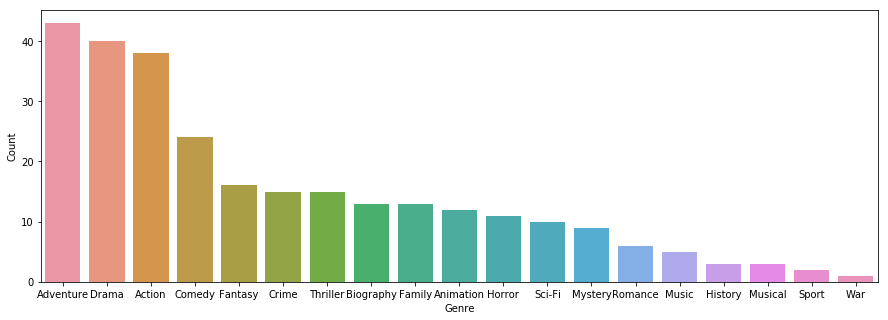

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = 'Genre', y = 'Count', data = genreSorted[:19])

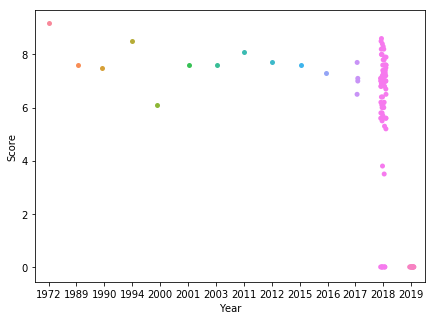

In [28]:
fig, ax = plt.subplots(figsize=(7,5))
sns.stripplot(x = 'Year', y = 'Score', data = Dataframe)

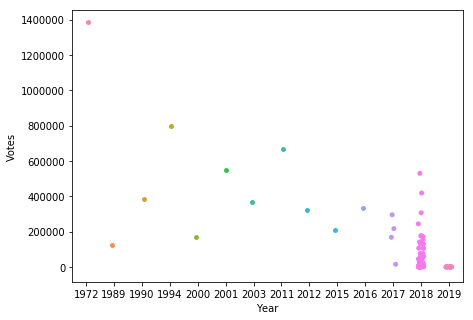

In [30]:
fig, ax = plt.subplots(figsize=(7,5))
sns.stripplot(x = 'Year', y = 'Votes', data = Dataframe)

In [39]:
Dataframe[['Votes','Gross_in_Million']].to_csv('Votes&Gross.csv')
movies_table2 = pd.read_csv("Votes&Gross.csv")
Dataframe = movies_table2[[ 'Votes', 'Gross_in_Million']]
Dataframe.head(30)

,Votes,Gross_in_Million
0,67335,123.141406
1,28386,0.000000
2,129790,156.323150
3,9447,64.336284
4,0,0.000000
5,10665,93.538233
6,6080,17.027682
7,14844,28.660245
8,106072,191.917436
9,0,0.000000


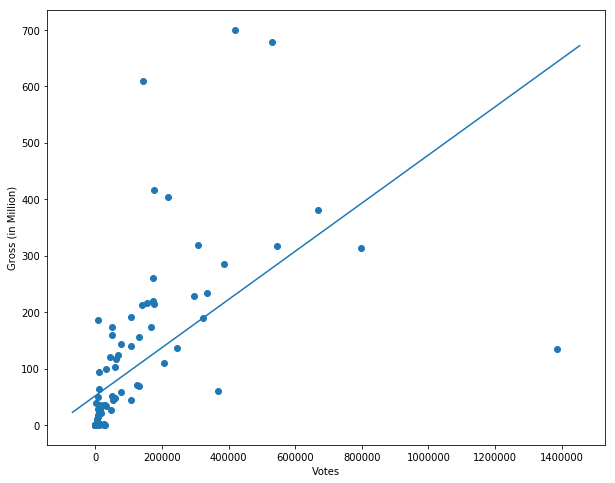

In [43]:
plt.figure(figsize=(10,8))
# Scatter plot
x = movie_Dict['Votes']
y = movie_Dict['Gross_in_Million']
plt.scatter(x, y)
plt.xlabel('Votes')
plt.ylabel('Gross (in Million)')

# Add Trendline
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
x_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(x_plot, m*x_plot + b, '-')